In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

In [ ]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [ ]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NODE/max_epochs=500 n_samples=1000 latent_size=3 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240506_Fig1_NBFF_GRU_TT_NODE_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_LDS_Sweep = pathTT + "20240506_Fig1_NBFF_LDS_TT_NODE_Sweep/"
subfolders_LDS = [f.path for f in os.scandir(path_LDS_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240506_Fig1_NBFF_NODE_TT_NODE_Sweep/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


In [ ]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTNODE_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LDS:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")


comparison.regroup()

In [ ]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "x",
}
comparison.compare_rate_state_r2(plot_dict=plot_dict)

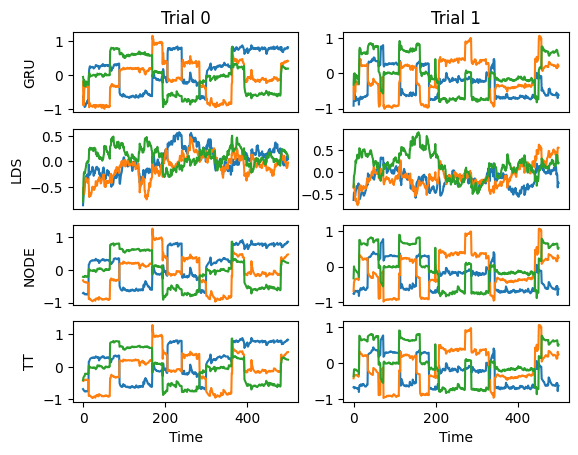

In [9]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)

In [ ]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)